# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
filas_vacias_completas = (spaceship.isnull().sum(axis=1) == len(spaceship.columns)).sum()
print(f"Filas totalmente vacías: {filas_vacias_completas}")

Filas totalmente vacías: 0


In [3]:
spaceship_clean = spaceship.dropna()

Now perform the same as before:
- Feature Scaling
- Feature Selection


In [4]:
col_numericas = spaceship_clean.select_dtypes(include=['float64', 'int64']).columns
col_categoricas = spaceship_clean.select_dtypes(exclude=['float64', 'int64']).columns
col_categoricas = col_categoricas.drop("Transported")

In [5]:
spaceship_final = pd.get_dummies(spaceship_clean, columns= col_categoricas, drop_first=False, dtype = int)
print(spaceship_final)

       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0     39.0          0.0        0.0           0.0     0.0     0.0        False   
1     24.0        109.0        9.0          25.0   549.0    44.0         True   
2     58.0         43.0     3576.0           0.0  6715.0    49.0        False   
3     33.0          0.0     1283.0         371.0  3329.0   193.0        False   
4     16.0        303.0       70.0         151.0   565.0     2.0         True   
...    ...          ...        ...           ...     ...     ...          ...   
8688  41.0          0.0     6819.0           0.0  1643.0    74.0        False   
8689  18.0          0.0        0.0           0.0     0.0     0.0        False   
8690  26.0          0.0        0.0        1872.0     1.0     0.0         True   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0        False   
8692  44.0        126.0     4688.0           0.0     0.0    12.0         True   

      PassengerId_0001_01  

In [6]:
features = spaceship_final.drop(columns= ["Transported"])
target = spaceship_final["Transported"]

<Axes: xlabel='Transported'>

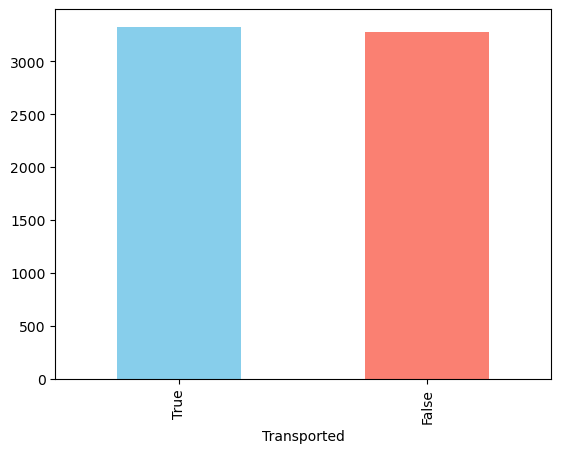

In [10]:
spaceship_final['Transported'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [13]:
bagging_reg = BaggingClassifier(DecisionTreeClassifier(max_depth=20), 
                               n_estimators=100, max_samples = 1000)

In [14]:
bagging_reg.fit(x_train_scaled, y_train)

,estimator,DecisionTreeC...(max_depth=20)
,n_estimators,100
,max_samples,1000
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


- Evaluate your model

In [15]:
pred = bagging_reg.predict(x_test_scaled)

In [16]:
accuracy = bagging_reg.score(x_test_scaled, y_test)
print(f"La precisión del modelo es: {accuracy:.2f}")

La precisión del modelo es: 0.78


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [ ]:
param_grid = {
    'n_estimators': [50, 100],               
    'estimator__max_depth': [5, 10],     
    'max_samples': [0.7, 1.0]                
}

# 2. Configuramos el GridSearch con "ojos" (verbose) y "turbo" (n_jobs)
grid_search = GridSearchCV(
    estimator=BaggingClassifier(estimator=DecisionTreeClassifier()), 
    param_grid=param_grid, 
    cv=5,
    n_jobs=-1,      
    verbose=2       
)

grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=50; total time= 3.2min
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=50; total time= 3.2min
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=50; total time= 3.2min
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=50; total time= 3.2min
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=50; total time= 3.2min
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=100; total time= 4.3min
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=100; total time= 4.3min
[CV] END estimator__max_depth=5, max_samples=0.7, n_estimators=100; total time= 4.3min
[CV] END estimator__max_depth=5, max_samples=1.0, n_estimators=50; total time= 4.1min
[CV] END estimator__max_depth=5, max_samples=1.0, n_estimators=50; total time= 4.1min
[CV] END estimator__max_depth=5, max_samples=1.0, n_estimators=50; total time

,estimator,BaggingClassi...eClassifier())
,param_grid,"{'estimator__max_depth': [5, 10], 'max_samples': [0.7, 1.0], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


- Run Grid Search

In [16]:
grid_search.best_params_

{'estimator__max_depth': 10, 'max_samples': 0.7, 'n_estimators': 100}

In [17]:
best_model = grid_search.best_estimator_

- Evaluate your model

In [18]:
accuracy = best_model.score(x_test_scaled, y_test)
print(f"La precisión del modelo es: {accuracy:.2f}")

La precisión del modelo es: 0.79
